### [플로이드-워셜] Gold IV 11404 플로이드

### 문제
n(2 ≤ n ≤ 100)개의 도시가 있다. 그리고 한 도시에서 출발하여 다른 도시에 도착하는 m(1 ≤ m ≤ 100,000)개의 버스가 있다. 각 버스는 한 번 사용할 때 필요한 비용이 있다.

모든 도시의 쌍 (A, B)에 대해서 도시 A에서 B로 가는데 필요한 비용의 최솟값을 구하는 프로그램을 작성하시오.

### 입력
첫째 줄에 도시의 개수 n이 주어지고 둘째 줄에는 버스의 개수 m이 주어진다. 그리고 셋째 줄부터 m+2줄까지 다음과 같은 버스의 정보가 주어진다. 먼저 처음에는 그 버스의 출발 도시의 번호가 주어진다. 버스의 정보는 버스의 시작 도시 a, 도착 도시 b, 한 번 타는데 필요한 비용 c로 이루어져 있다. 시작 도시와 도착 도시가 같은 경우는 없다. 비용은 100,000보다 작거나 같은 자연수이다.

시작 도시와 도착 도시를 연결하는 노선은 하나가 아닐 수 있다.

### 출력
n개의 줄을 출력해야 한다. i번째 줄에 출력하는 j번째 숫자는 도시 i에서 j로 가는데 필요한 최소 비용이다. 만약, i에서 j로 갈 수 없는 경우에는 그 자리에 0을 출력한다.

### 입출력 예

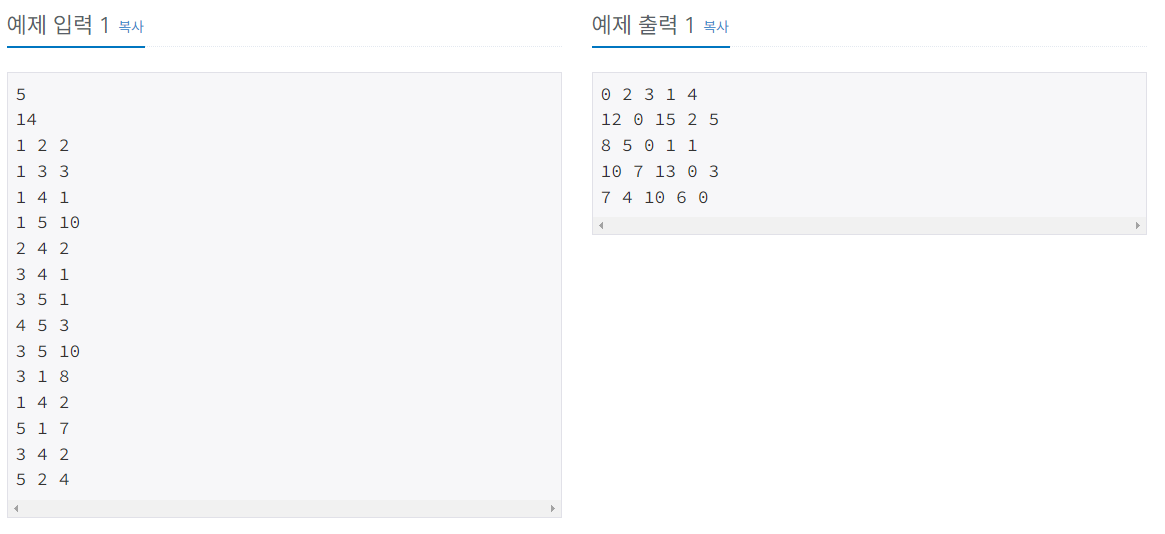

### 내 풀이

In [1]:
import sys

# 입력을 빠르게 받기 위해 sys.stdin.readline 사용
input = sys.stdin.readline

# 도시의 개수 N과 버스 노선의 개수 M 입력
N = int(input())
M = int(input())
distance = [[sys.maxsize for j in range(N+1)] for i in range(N+1)]

# 자기 자신으로 가는 경로의 거리는 0으로 초기화
for i in range(1, N+1):
    distance[i][i] = 0

# 버스 정보 입력받아 그래프에 거리 저장
for _ in range(M):
    s, e, w = map(int, input().split())
    if distance[s][e] > w:  # 최소 거리를 저장
        distance[s][e] = w

# 플로이드 워셜 알고리즘 수행
for k in range(1, N + 1):
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            # 더 작은 거리로 갱신할 수 있다면 갱신
            if distance[i][j] > distance[i][k] + distance[k][j]:
                distance[i][j] = distance[i][k] + distance[k][j]

# 결과 출력
for i in range(1, N + 1):
    for j in range(1, N + 1):
        if distance[i][j] == sys.maxsize:
            print(0, end=' ')
        else:
            print(distance[i][j], end=' ')
    print()  # 줄 바꿈


### 지피티는 이렇게 풀더라

In [ ]:
INF = int(1e9)  # 무한대 값을 설정

n = int(input())  # 도시의 개수
m = int(input())  # 버스의 개수

# 그래프 초기화
graph = [[INF] * (n + 1) for _ in range(n + 1)]

# 자기 자신으로 가는 비용은 0으로 초기화
for i in range(1, n + 1):
    graph[i][i] = 0

# 버스 정보 입력 받아서 그래프에 비용 저장
for _ in range(m):
    a, b, c = map(int, input().split())  # 시작 도시, 도착 도시, 비용
    graph[a][b] = min(graph[a][b], c)  # 같은 경로에 여러 개의 버스가 있을 수 있으므로 최소 비용 저장

# 플로이드-워셜 알고리즘 수행
for k in range(1, n + 1):
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j])

# 결과 출력
for i in range(1, n + 1):
    for j in range(1, n + 1):
        if graph[i][j] == INF:
            print(0, end=' ')
        else:
            print(graph[i][j], end=' ')
    print()  # 줄 바꿈
